# Import Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create Label

In [5]:
label_df = pd.read_csv('labels.csv')
label_df.head(10)

,filename,format
0,COVID-1,PNG
1,COVID-2,PNG
2,COVID-3,PNG
3,COVID-4,PNG
4,COVID-5,PNG
5,COVID-6,PNG
6,COVID-7,PNG
7,COVID-8,PNG
8,COVID-9,PNG
9,COVID-10,PNG


In [6]:
def preprocess_normal_label(label):
    if label == "NORMAL":
        return "Normal"
    return label

In [7]:
def create_label_and_folder_series(df):
    label_dict = {
        'COVID':0,
        'Lung_Opacity':1,
        'Normal':2,
        'Viral Pneumonia':3
    }
    labels_series = df['filename'].apply(lambda x: label_dict[preprocess_normal_label(x.split('-')[0])])
    folders_series = df['filename'].apply(lambda x: preprocess_normal_label(x.split('-')[0]))
    return labels_series, folders_series

In [8]:
labels_series, folders_series = create_label_and_folder_series(label_df)

In [9]:
labels_series

0        0
1        0
2        0
3        0
4        0
        ..
21160    3
21161    3
21162    3
21163    3
21164    3
Name: filename, Length: 21165, dtype: int64

In [10]:
folders_series

0                  COVID
1                  COVID
2                  COVID
3                  COVID
4                  COVID
              ...       
21160    Viral Pneumonia
21161    Viral Pneumonia
21162    Viral Pneumonia
21163    Viral Pneumonia
21164    Viral Pneumonia
Name: filename, Length: 21165, dtype: object

In [11]:
final_label = label_df.copy()
final_label['folder'] = folders_series
final_label['labels'] = labels_series


In [12]:
final_label.head(10)

,filename,format,folder,labels
0,COVID-1,PNG,COVID,0
1,COVID-2,PNG,COVID,0
2,COVID-3,PNG,COVID,0
3,COVID-4,PNG,COVID,0
4,COVID-5,PNG,COVID,0
5,COVID-6,PNG,COVID,0
6,COVID-7,PNG,COVID,0
7,COVID-8,PNG,COVID,0
8,COVID-9,PNG,COVID,0
9,COVID-10,PNG,COVID,0


In [47]:
def rename_normal_filename(filename):
    # print(filename)
    idx = filename.split('-')[1]
    return f'Normal-{idx}'

In [34]:
rename_normal_filename('NORMAL-1')

'Normal-1'

In [60]:
new_final_label = final_label[final_label.folder != 'Normal']

In [62]:
new_final_label

,filename,format,folder,labels
0,COVID-1,PNG,COVID,0
1,COVID-2,PNG,COVID,0
2,COVID-3,PNG,COVID,0
3,COVID-4,PNG,COVID,0
4,COVID-5,PNG,COVID,0
...,...,...,...,...
21160,Viral Pneumonia-1341,PNG,Viral Pneumonia,3
21161,Viral Pneumonia-1342,PNG,Viral Pneumonia,3
21162,Viral Pneumonia-1343,PNG,Viral Pneumonia,3
21163,Viral Pneumonia-1344,PNG,Viral Pneumonia,3


Text(0, 0.5, 'Count')

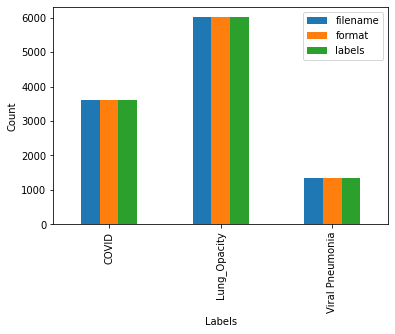

In [63]:
new_final_label.groupby('folder').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

In [64]:
normal_df = final_label[final_label.folder == 'Normal']

In [65]:
normal_df.filename =  normal_df.filename.map(rename_normal_filename)

/tmp/ipykernel_38378/2430154147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df.filename =  normal_df.filename.map(rename_normal_filename)


In [66]:
normal_df

,filename,format,folder,labels
9628,Normal-1,PNG,Normal,2
9629,Normal-2,PNG,Normal,2
9630,Normal-3,PNG,Normal,2
9631,Normal-4,PNG,Normal,2
9632,Normal-5,PNG,Normal,2
...,...,...,...,...
19815,Normal-10188,PNG,Normal,2
19816,Normal-10189,PNG,Normal,2
19817,Normal-10190,PNG,Normal,2
19818,Normal-10191,PNG,Normal,2


In [67]:
final_label = pd.concat([new_final_label, normal_df])
final_label

,filename,format,folder,labels
0,COVID-1,PNG,COVID,0
1,COVID-2,PNG,COVID,0
2,COVID-3,PNG,COVID,0
3,COVID-4,PNG,COVID,0
4,COVID-5,PNG,COVID,0
...,...,...,...,...
19815,Normal-10188,PNG,Normal,2
19816,Normal-10189,PNG,Normal,2
19817,Normal-10190,PNG,Normal,2
19818,Normal-10191,PNG,Normal,2


Text(0, 0.5, 'Count')

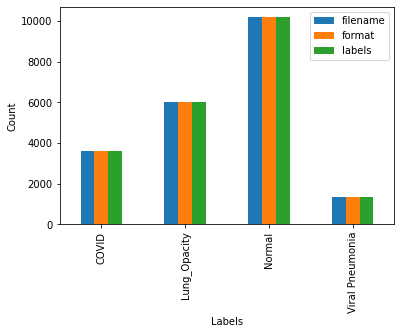

In [68]:
final_label.groupby('folder').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

# Check Data Distribution

In [69]:
label_dict = {
        0:'COVID',
        1:'Lung_Opacity',
        2:'Normal',
        3:'Viral Pneumonia'
    }
eda_df = pd.DataFrame({
'filename':final_label.filename.values,
'labels':final_label.labels.values})
eda_df.labels = eda_df['labels'].apply(lambda x: label_dict[x])
eda_df.head(10)

,filename,labels
0,COVID-1,COVID
1,COVID-2,COVID
2,COVID-3,COVID
3,COVID-4,COVID
4,COVID-5,COVID
5,COVID-6,COVID
6,COVID-7,COVID
7,COVID-8,COVID
8,COVID-9,COVID
9,COVID-10,COVID


In [70]:
eda_df.groupby('labels').count()

,filename
labels,
COVID,3616
Lung_Opacity,6012
Normal,10192
Viral Pneumonia,1345


Text(0, 0.5, 'Count')

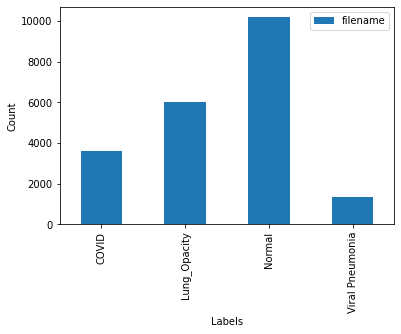

In [71]:

eda_df.groupby('labels').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

# Split Data

In [72]:
train_df, valid_df = train_test_split(final_label, test_size=0.4, random_state=42)

In [73]:
train_df.groupby('labels').count()

,filename,format,folder
labels,,,
0,2179,2179,2179
1,3561,3561,3561
2,6171,6171,6171
3,788,788,788


In [74]:
valid_df.groupby('labels').count()

,filename,format,folder
labels,,,
0,1437,1437,1437
1,2451,2451,2451
2,4021,4021,4021
3,557,557,557


## Split Validation into Valid and Benchmark.

Benchmark Dataset will contains 100 images for each classes to meets balanced data distribution.

In [75]:
valid_df.labels[0]==0

True

In [76]:
covid_df = valid_df[valid_df['labels'] == 0]

In [77]:
lung_opc_df = valid_df[valid_df['labels'] == 1]
normal_df = valid_df[valid_df['labels']==2]
v_pneumonia_df = valid_df[valid_df['labels']==3]

In [78]:
benchmark_df = pd.concat((
                    covid_df.head(50), covid_df.tail(50),
                    normal_df.head(50), normal_df.tail(50),
                    v_pneumonia_df.head(50), v_pneumonia_df.tail(50),
                    lung_opc_df.head(50), lung_opc_df.tail(50),
                    ))

In [79]:
benchmark_df.index

Int64Index([2127, 3125, 2929,  971, 1371,  856, 2238, 2300, 1290,  408,
            ...
            4592, 7161, 7897, 6260, 8142, 4589, 4130, 6827, 6321, 6055],
           dtype='int64', length=400)

In [80]:
len(benchmark_df)

400

In [81]:
valid_df = valid_df.drop(index=benchmark_df.index)

In [82]:
valid_df

,filename,format,folder,labels
13063,Normal-3436,PNG,Normal,2
18719,Normal-9092,PNG,Normal,2
10396,Normal-769,PNG,Normal,2
12873,Normal-3246,PNG,Normal,2
17764,Normal-8137,PNG,Normal,2
...,...,...,...,...
13273,Normal-3646,PNG,Normal,2
10111,Normal-484,PNG,Normal,2
12024,Normal-2397,PNG,Normal,2
17492,Normal-7865,PNG,Normal,2


Text(0, 0.5, 'Count')

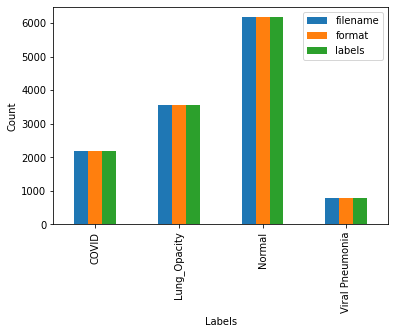

In [84]:
train_df.groupby('folder').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

In [94]:
len(train_df)

12699

In [95]:
len(train_df.groupby('folder').count().filename)

4

In [111]:
def count_weighted(df):
    weight = list()
    total_class = len(df.groupby('folder').count().filename)
    total_files = len(df)
    for total_files_in_class in train_df.groupby('folder').count().filename:
        # print(total_files_in_class)
        # print(total_files)
        w = total_files / (total_class * total_files_in_class)
        # print(w)
        weight.append(w)
    return weight

In [112]:
weight = count_weighted(train_df)

In [115]:
import torch
torch.Tensor(weight)

tensor([1.4570, 0.8915, 0.5145, 4.0289])

Text(0, 0.5, 'Count')

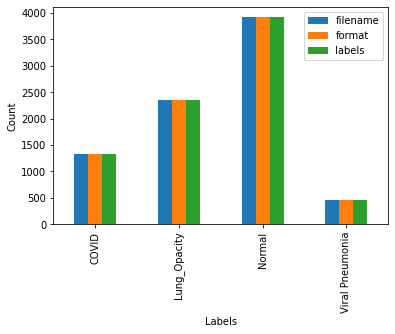

In [85]:
valid_df.groupby('folder').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

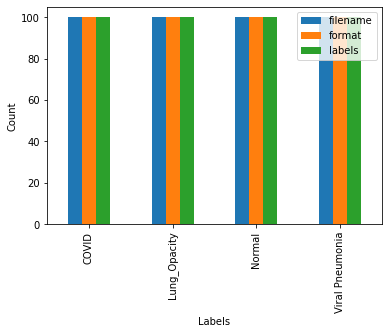

In [86]:
benchmark_df.groupby('folder').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

# Save

In [87]:
train_df.to_csv("train.csv", index=False)
valid_df.to_csv("val.csv", index=False)
benchmark_df.to_csv("test.csv", index=False)